In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/maths/Desktop/FML-AVI-230957164/Week 7/German Credit Data.csv")

# Check the first few rows of the data to confirm it has been loaded correctly
print(data.head())

# Preprocessing the data
X = data.drop(columns=['status'])  # Features (excluding the target column 'status')
y = data['status']  # Target variable

# Apply One-Hot Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the dataset after splitting
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

  checkin_acc  duration credit_history  amount savings_acc present_emp_since  \
0         A11         6            A34    1169         A65               A75   
1         A12        48            A32    5951         A61               A73   
2         A14        12            A34    2096         A61               A74   
3         A11        42            A32    7882         A61               A74   
4         A11        24            A33    4870         A61               A73   

   inst_rate personal_status  residing_since  age inst_plans  num_credits  \
0          4             A93               4   67       A143            2   
1          2             A92               2   22       A143            1   
2          2             A93               3   49       A143            1   
3          2             A93               4   45       A143            1   
4          3             A93               4   53       A143            2   

    job  status  
0  A173       0  
1  A173       1  
2 

In [3]:
# Create the DecisionTreeClassifier model
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': list(range(2, 11))     # Maximum depth of the tree
}

# GridSearchCV with 10-fold cross-validation and ROC AUC scoring
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'criterion': 'gini', 'max_depth': 4}


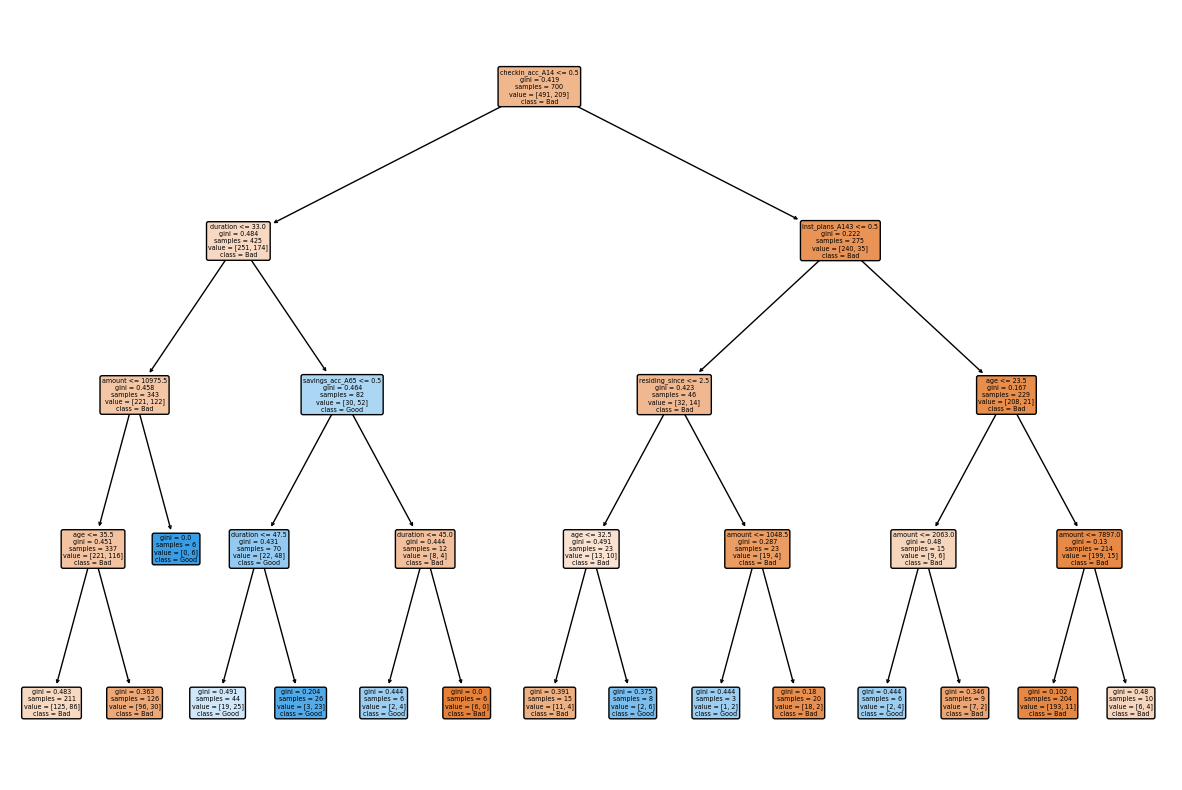

In [4]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Visualize the decision tree using matplotlib
plt.figure(figsize=(15,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Bad', 'Good'], rounded=True)
plt.show()


In [5]:
# Display the text representation of the decision tree
tree_rules = export_text(best_model, feature_names=list(X.columns))
print(tree_rules)


|--- checkin_acc_A14 <= 0.50
|   |--- duration <= 33.00
|   |   |--- amount <= 10975.50
|   |   |   |--- age <= 35.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  35.50
|   |   |   |   |--- class: 0
|   |   |--- amount >  10975.50
|   |   |   |--- class: 1
|   |--- duration >  33.00
|   |   |--- savings_acc_A65 <= 0.50
|   |   |   |--- duration <= 47.50
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  47.50
|   |   |   |   |--- class: 1
|   |   |--- savings_acc_A65 >  0.50
|   |   |   |--- duration <= 45.00
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  45.00
|   |   |   |   |--- class: 0
|--- checkin_acc_A14 >  0.50
|   |--- inst_plans_A143 <= 0.50
|   |   |--- residing_since <= 2.50
|   |   |   |--- age <= 32.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  32.50
|   |   |   |   |--- class: 1
|   |   |--- residing_since >  2.50
|   |   |   |--- amount <= 1048.50
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  1048.50
|   |   |   |   |--